# Master BigData UCM 2023

## 1. Datos COVID



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import plotnine
from plotnine import *

### Carga de datos

A partir del fichero ya guardado en disco de su lectura y primer pre-proceso

In [5]:
covid = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/datos_covid.pkl")

In [36]:
covid.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0


In [6]:
covid.shape

(1179780, 8)

In [7]:
covid.describe(include = 'all')

<ipython-input-7-ad1822e2d363>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
count,1157520,1179780,1179780,1179780,1.179780e+06,1.179780e+06,1.179780e+06,1.179780e+06
unique,52,3,10,742,NaN,NaN,NaN,NaN
top,A,H,0-9,2020-01-01 00:00:00,NaN,NaN,NaN,NaN
freq,22260,393260,117978,1590,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2022-01-11 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.435463e+00,3.816534e-01,3.787401e-02,7.660327e-02
std,NaN,NaN,NaN,NaN,3.525244e+01,2.535166e+00,3.145976e-01,8.157232e-01
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


# 2. Visualizaciones con ggplot

Además del contenido recogido en la docu. teórica, es aconsejable seguir este excelente (y práctico) tutorial:

https://realpython.com/ggplot-python/


## 2.1 Barplot por sexo y edad



In [13]:
covid2 = covid.groupby(['sexo', 'grupo_edad']).sum(numeric_only=True) # segmentacion por sexo y grupo de edad
covid2 = pd.DataFrame(covid2.to_records())


In [14]:
covid2

,sexo,grupo_edad,num_casos,num_hosp,num_uci,num_def
0,H,0-9,292893,2118,118,13
1,H,10-19,469462,2006,170,13
2,H,20-29,569456,6296,485,73
3,H,30-39,533726,13148,1285,183
4,H,40-49,617587,28848,3395,662
5,H,50-59,493627,41774,6421,2412
6,H,60-69,300110,49149,9565,6433
7,H,70-79,174752,49219,7639,12991
8,H,80+,130817,53698,1187,26994
9,H,NC,42694,619,59,116


In [15]:
mascara_sexo = covid2['sexo'] != 'NC' # mascara/filtro
mascara_grupo_edad = covid2['grupo_edad'] != 'NC' # mascara/filtro
covid2 = covid2[mascara_sexo] # aplicacion de laa mascaras
covid2 = covid2[mascara_grupo_edad]


<ipython-input-15-67b086e26797>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [16]:
covid2

,sexo,grupo_edad,num_casos,num_hosp,num_uci,num_def
0,H,0-9,292893,2118,118,13
1,H,10-19,469462,2006,170,13
2,H,20-29,569456,6296,485,73
3,H,30-39,533726,13148,1285,183
4,H,40-49,617587,28848,3395,662
5,H,50-59,493627,41774,6421,2412
6,H,60-69,300110,49149,9565,6433
7,H,70-79,174752,49219,7639,12991
8,H,80+,130817,53698,1187,26994
10,M,0-9,280789,1697,89,5


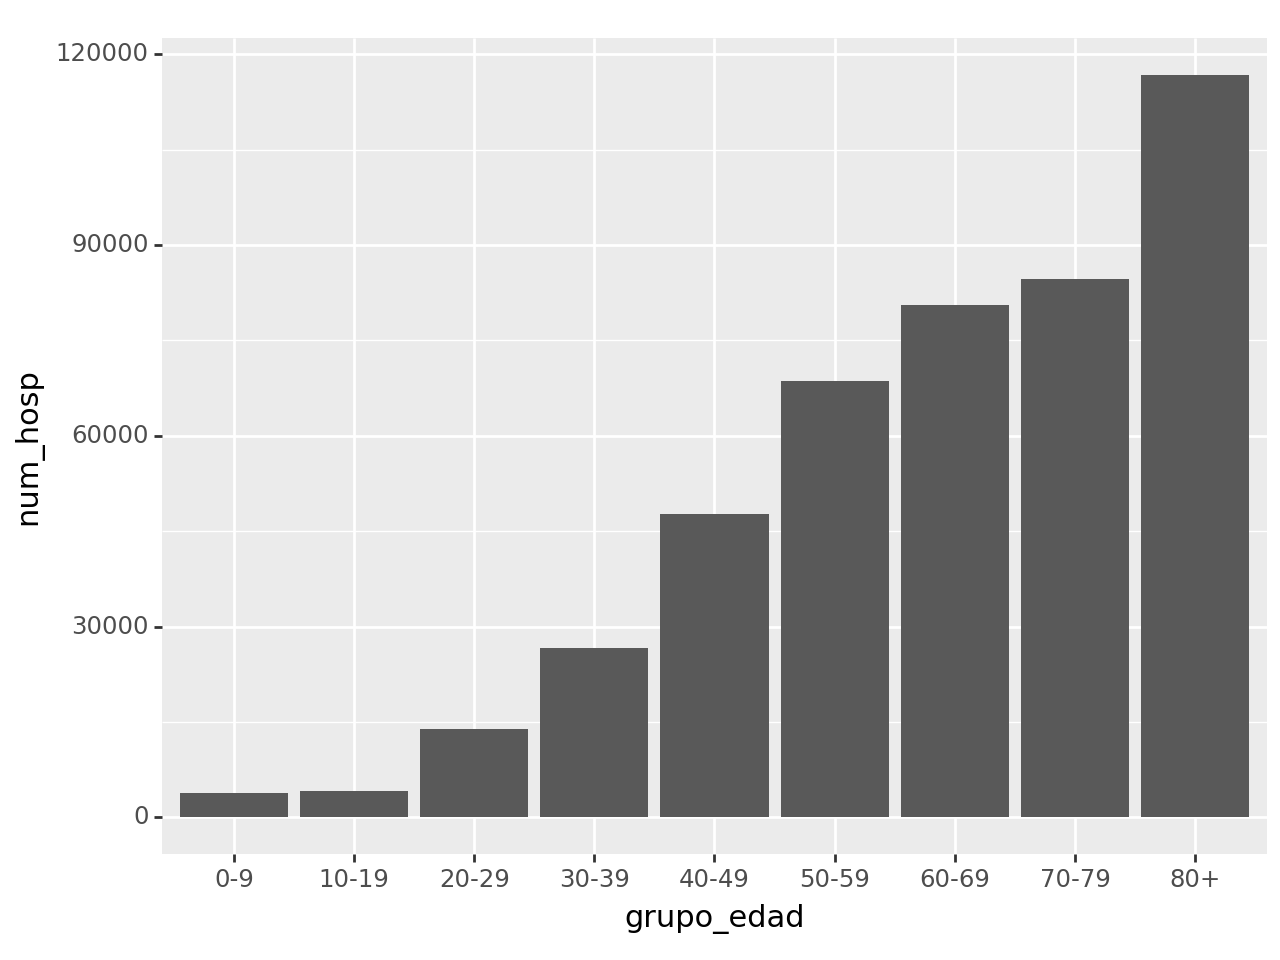

<Figure Size: (640 x 480)>

In [18]:
(
ggplot(covid2)
+ aes(x = 'grupo_edad',
      y = 'num_hosp')
    + geom_bar(stat = "identity") # por defecto haria sumas, pero ya las tenemos hechas. Hay que cambiar a identity
)

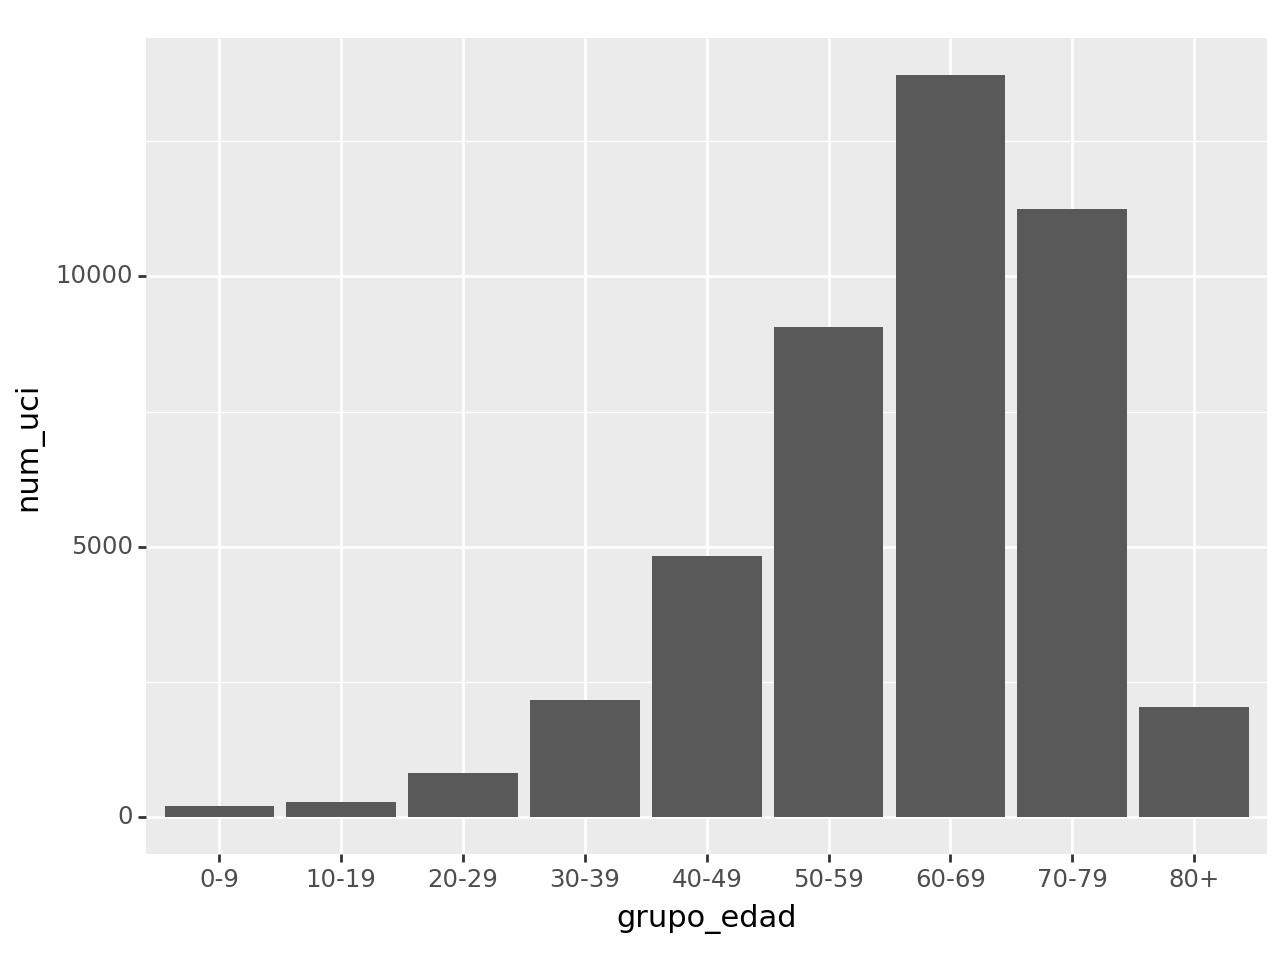

<Figure Size: (640 x 480)>

In [20]:
(
ggplot(covid2)
+ aes(x = 'grupo_edad',
      y = 'num_uci')
    + geom_bar(stat = "identity")
)

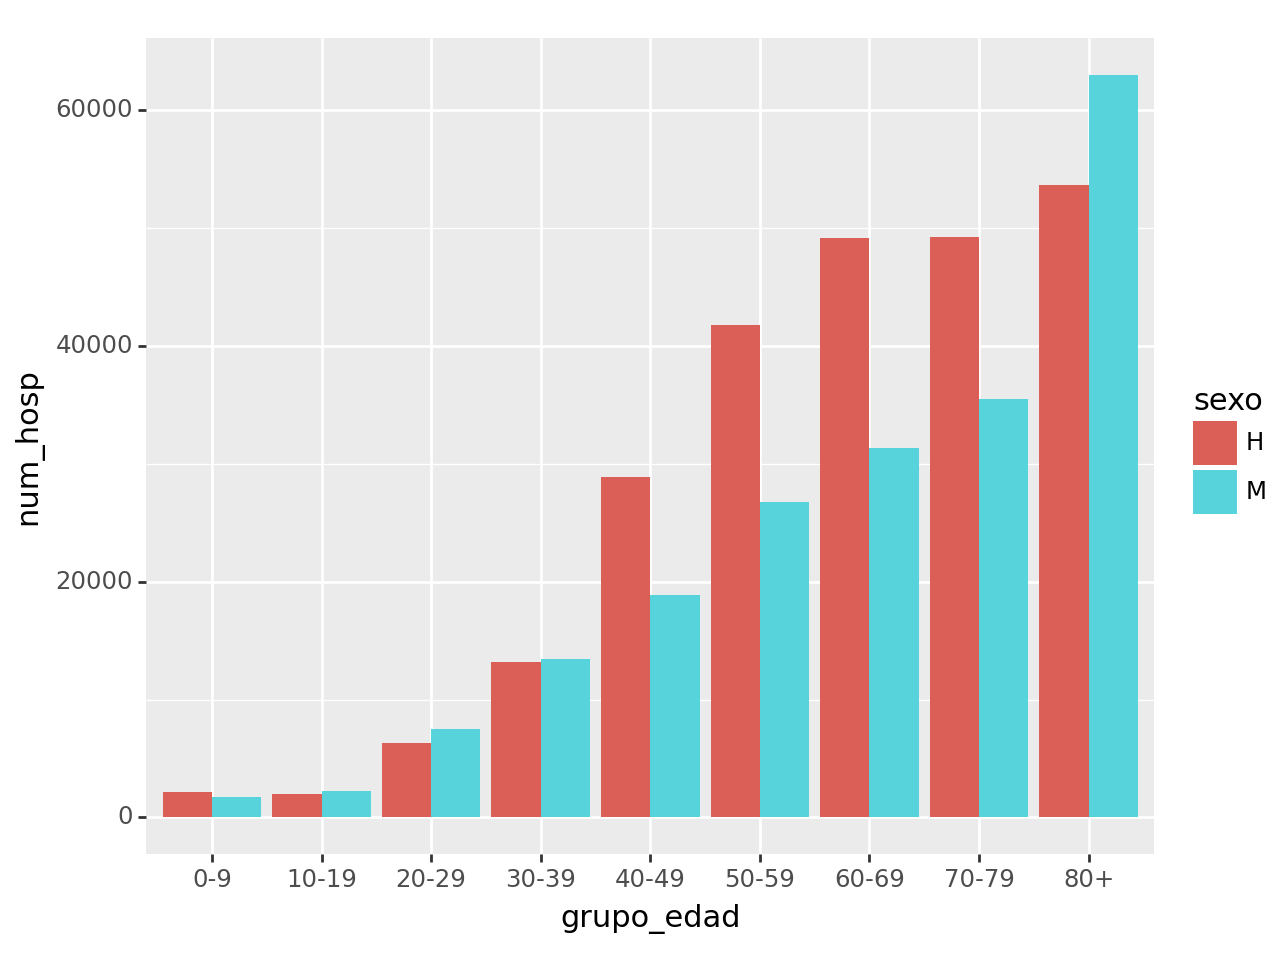

<Figure Size: (640 x 480)>

In [23]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad',
          'num_hosp',
          fill = 'sexo')  # What variable to use to segment
    + geom_bar(stat = "identity",
              position = 'dodge') # Geometric object to use for drawing

)

Los hombres fueron más hospitalizados. ¿Esto se debe a que se contagiaron más?

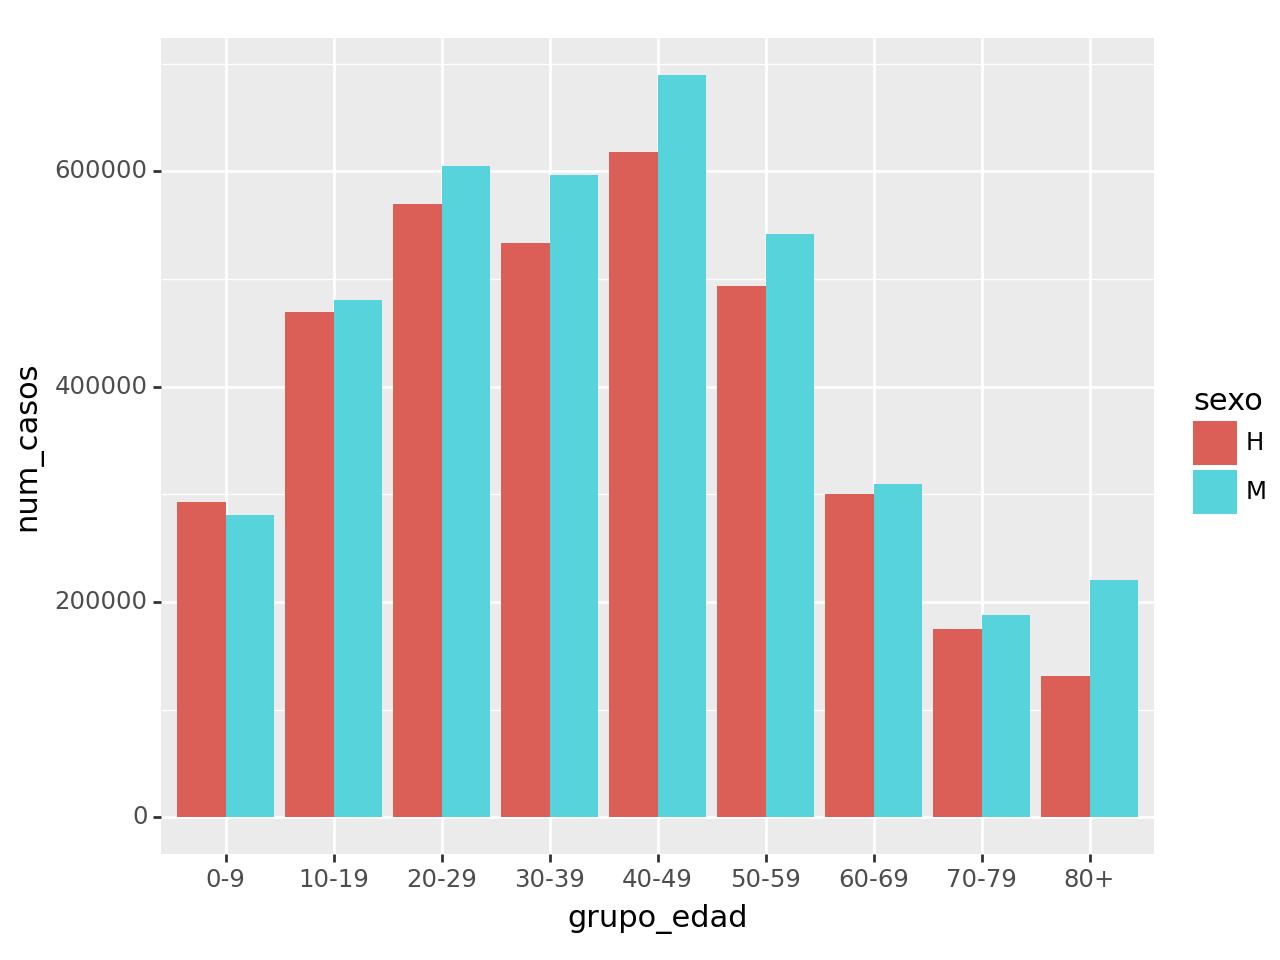

<Figure Size: (640 x 480)>

In [24]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad',
          'num_casos',
          fill = 'sexo')  # What variable to use
    + geom_bar(stat = "identity",
              position = 'dodge') # Geometric object to use for drawing

)

Resulta que no. Las mujeres se contagiaron más.

In [25]:
grafico = (
    ggplot(covid2)  # What data to use
    + aes('grupo_edad',
          'num_casos',
          fill = 'sexo')  # What variable to use
    + geom_bar(stat = "identity",
              position = 'dodge') # Geometric object to use for drawing

)

In [26]:
grafico2 = grafico + ( coord_flip())  # para rotar gráfico

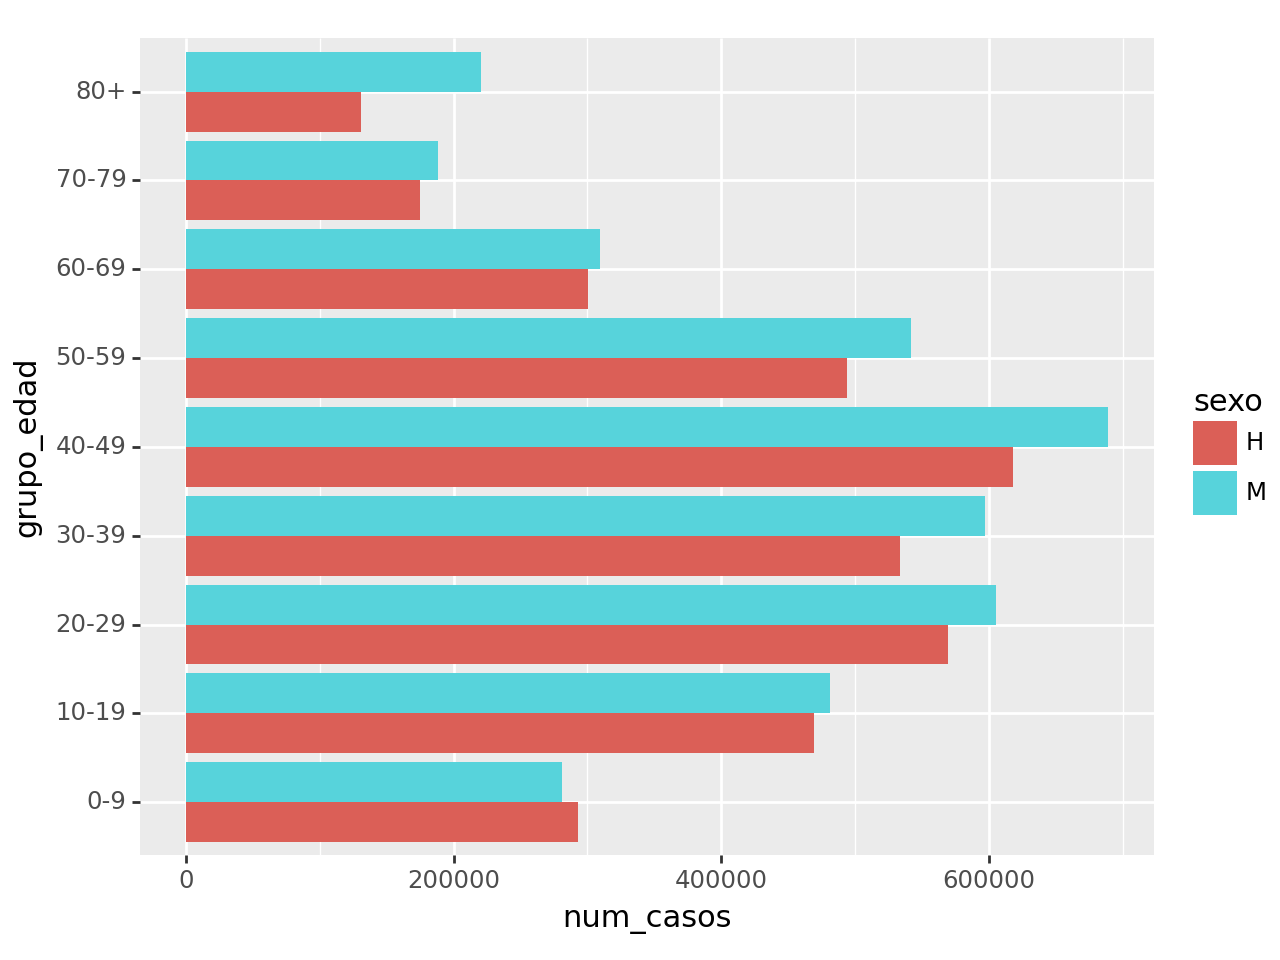

<Figure Size: (640 x 480)>

In [27]:
grafico2

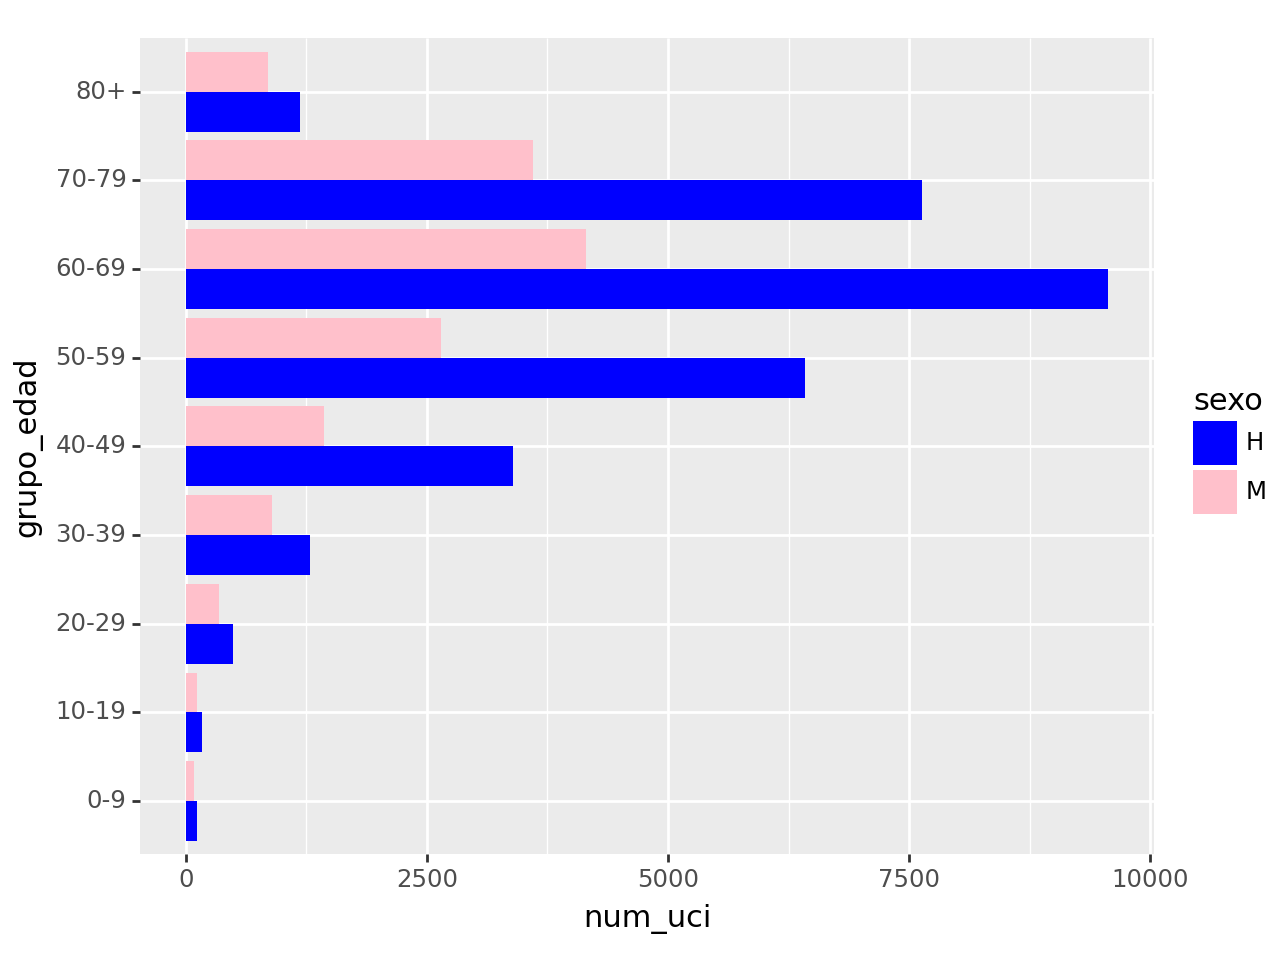

<Figure Size: (640 x 480)>

In [28]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad',
          'num_uci',
          fill = 'sexo')  # What variable to use
    + geom_bar(stat = "identity",
              position = 'dodge') # Geometric object to use for drawing
    + coord_flip()
    + scale_fill_manual(values = ("blue", "pink"))
)

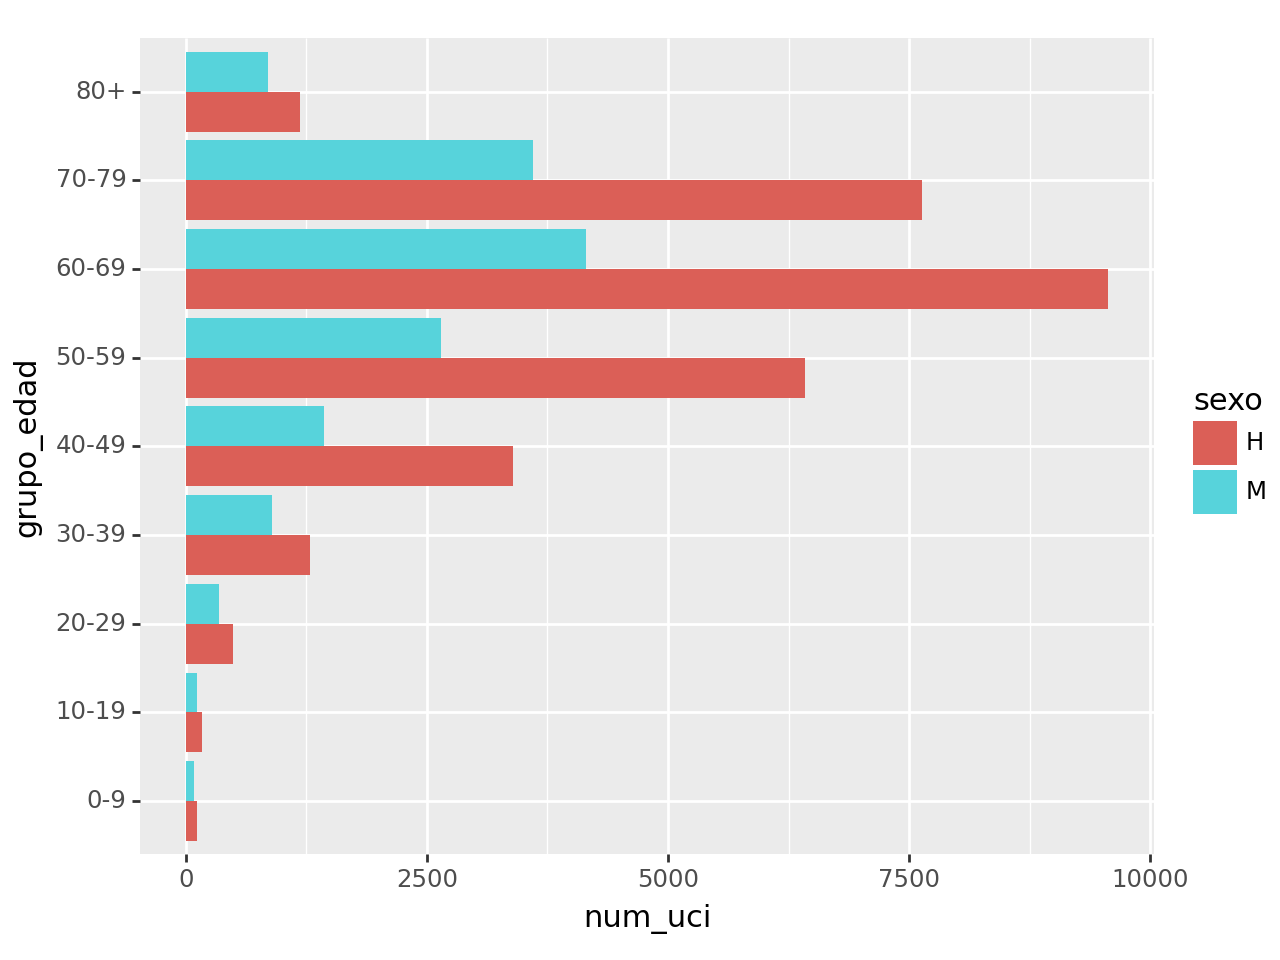

<Figure Size: (640 x 480)>

In [29]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad',
          'num_uci',
          fill = 'sexo')  # What variable to use
    + geom_bar(position = "dodge",
               stat = "identity")
    + coord_flip()# Geometric object to use for drawing

)

Por edad y número de fallecidos.

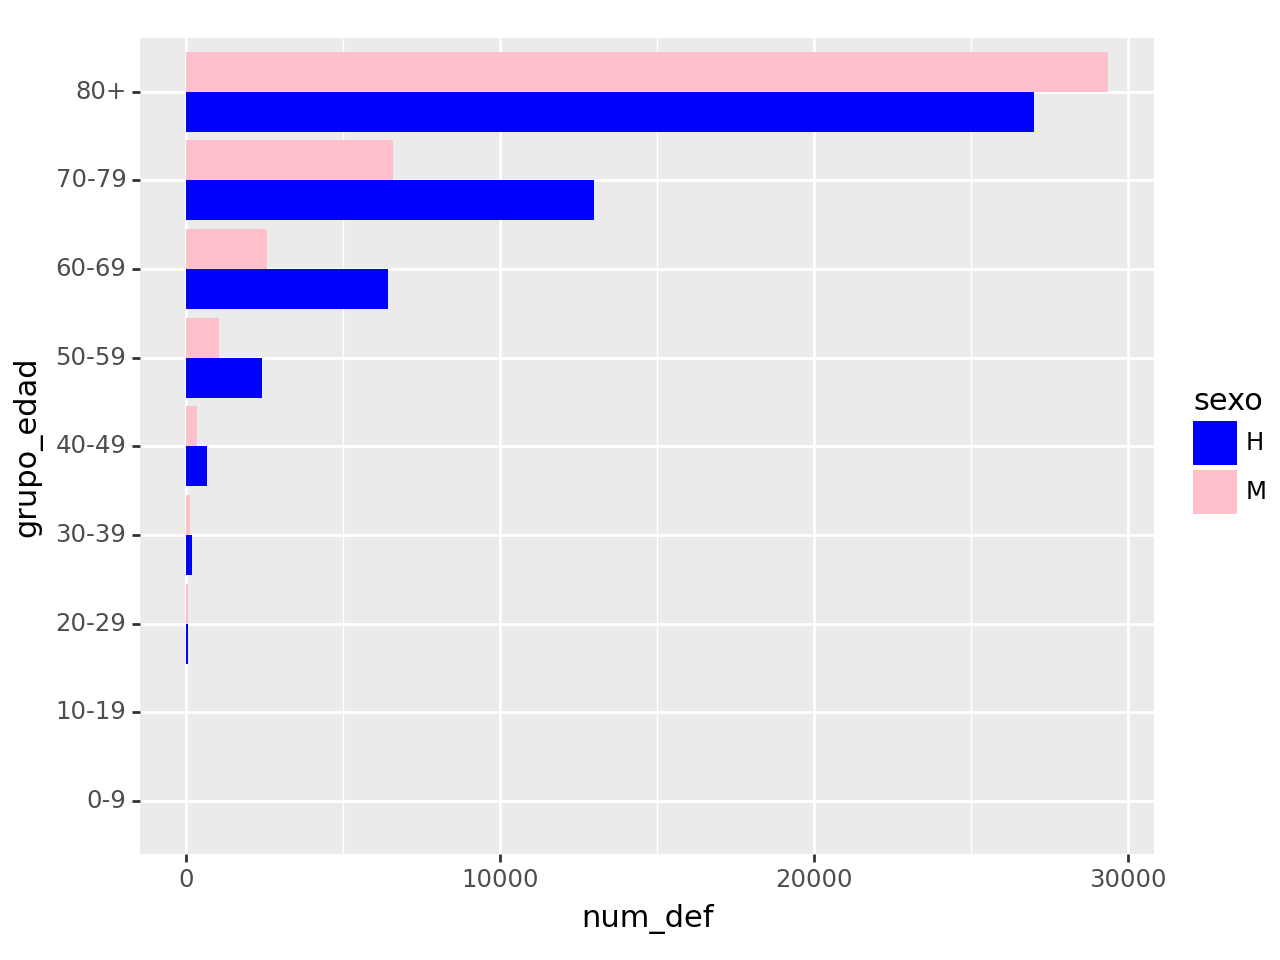

<Figure Size: (640 x 480)>

In [30]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad',
          'num_def',
          fill = 'sexo')  # What variable to use
    + geom_bar(position = "dodge",
               stat = "identity") # Geometric object to use for drawing
    + coord_flip()
    + scale_fill_manual(values = ("blue", "pink"))

)

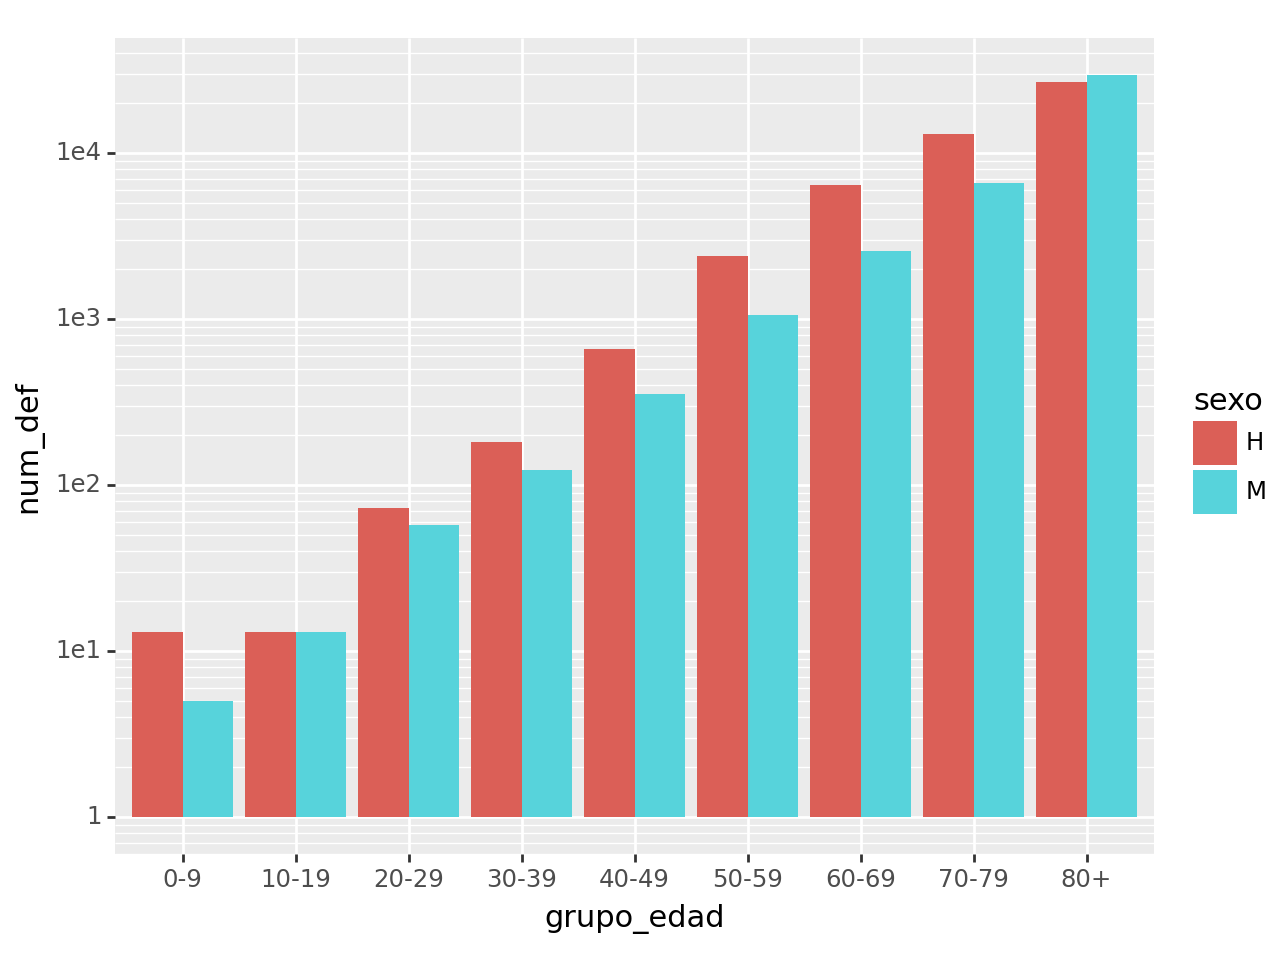

<Figure Size: (640 x 480)>

In [31]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad',
          'num_def',
          fill = 'sexo')  # What variable to use
    + geom_bar(position = "dodge",
               stat = "identity")
    + scale_y_log10()# Geometric object to use for drawing

)

## 2.2 Olas (series temporales)



In [32]:
covid3 = covid.groupby(['sexo', 'fecha']).sum()
covid3 = pd.DataFrame(covid3.to_records())
mascara_sexo = covid3['sexo'] != 'NC'
#mascara_grupo_edad = covid3['grupo_edad'] != 'NC'
covid3 = covid3[mascara_sexo]
#covid2 = covid3[mascara_grupo_edad]


<ipython-input-32-e71cc5476e0b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [38]:
covid3.head()

,sexo,fecha,num_casos,num_hosp,num_uci,num_def
0,H,2020-01-01,0,5,0,0
1,H,2020-01-02,0,39,1,0
2,H,2020-01-03,0,2,0,0
3,H,2020-01-04,0,5,0,0
4,H,2020-01-05,0,5,0,0


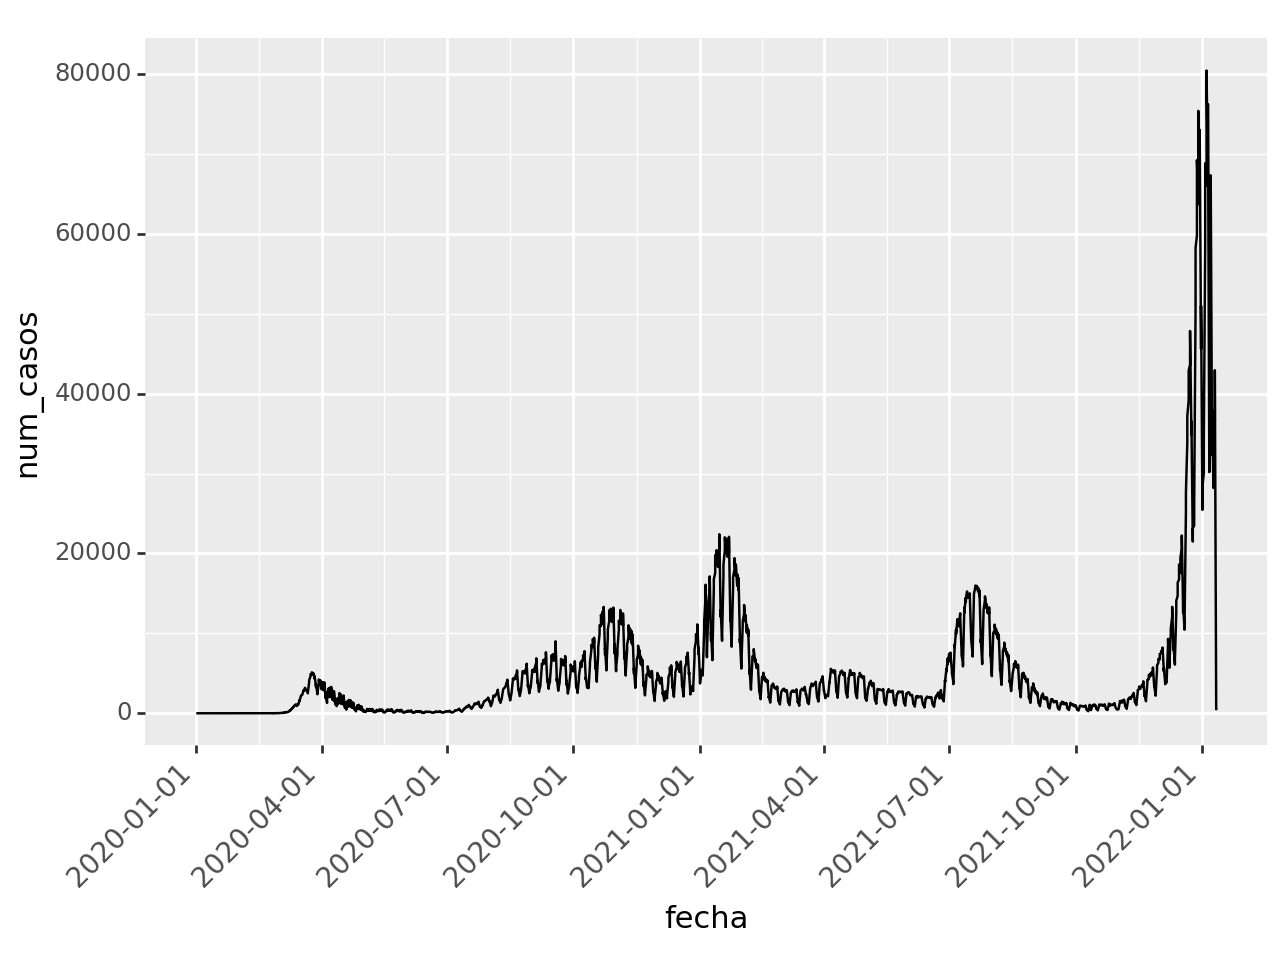

<Figure Size: (640 x 480)>

In [34]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha",
          y = "num_casos")  # What variable to use
    + geom_line() # geometria de lineas
    + theme(axis_text_x = element_text(angle = 45, # uso del tema para torcer las fechas
                                       hjust = 1,
                                       size = 10))# Geometric object to use for drawing
)

Los saltitos se debe a que en fin de semana no se tomaban datos.

In [40]:
g = (
    ggplot(covid3)  # What data to use
    + aes(x = "fecha",
          y = "num_casos",
         color = 'sexo')  # What variable to use
    + geom_smooth(method = "lowess",
                  span = 0.03)  # Geometric object to use for drawing
)

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


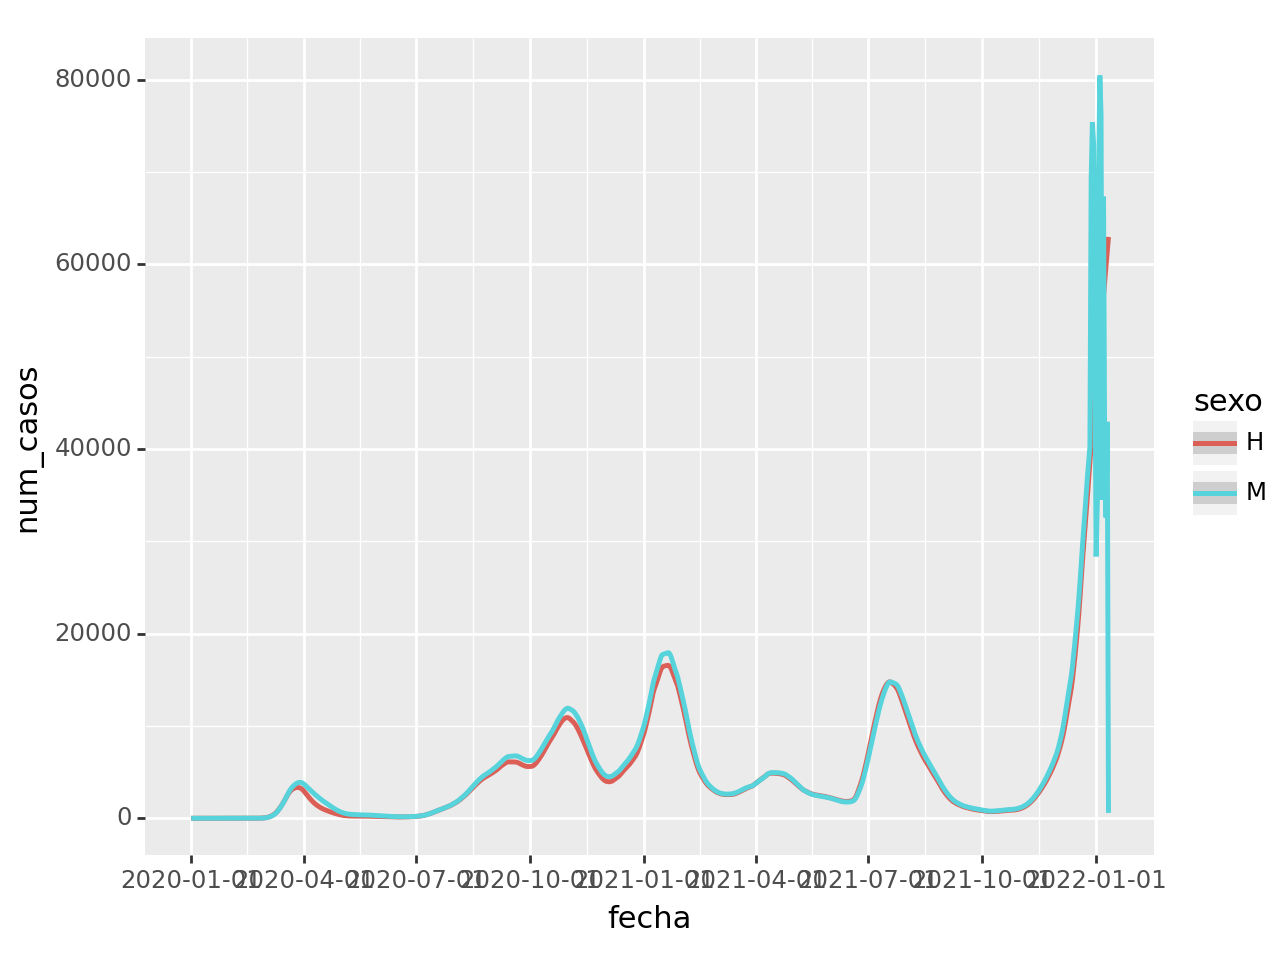

<Figure Size: (640 x 480)>

In [41]:
g

In [42]:
g = g + theme(figure_size=(12, 10))

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


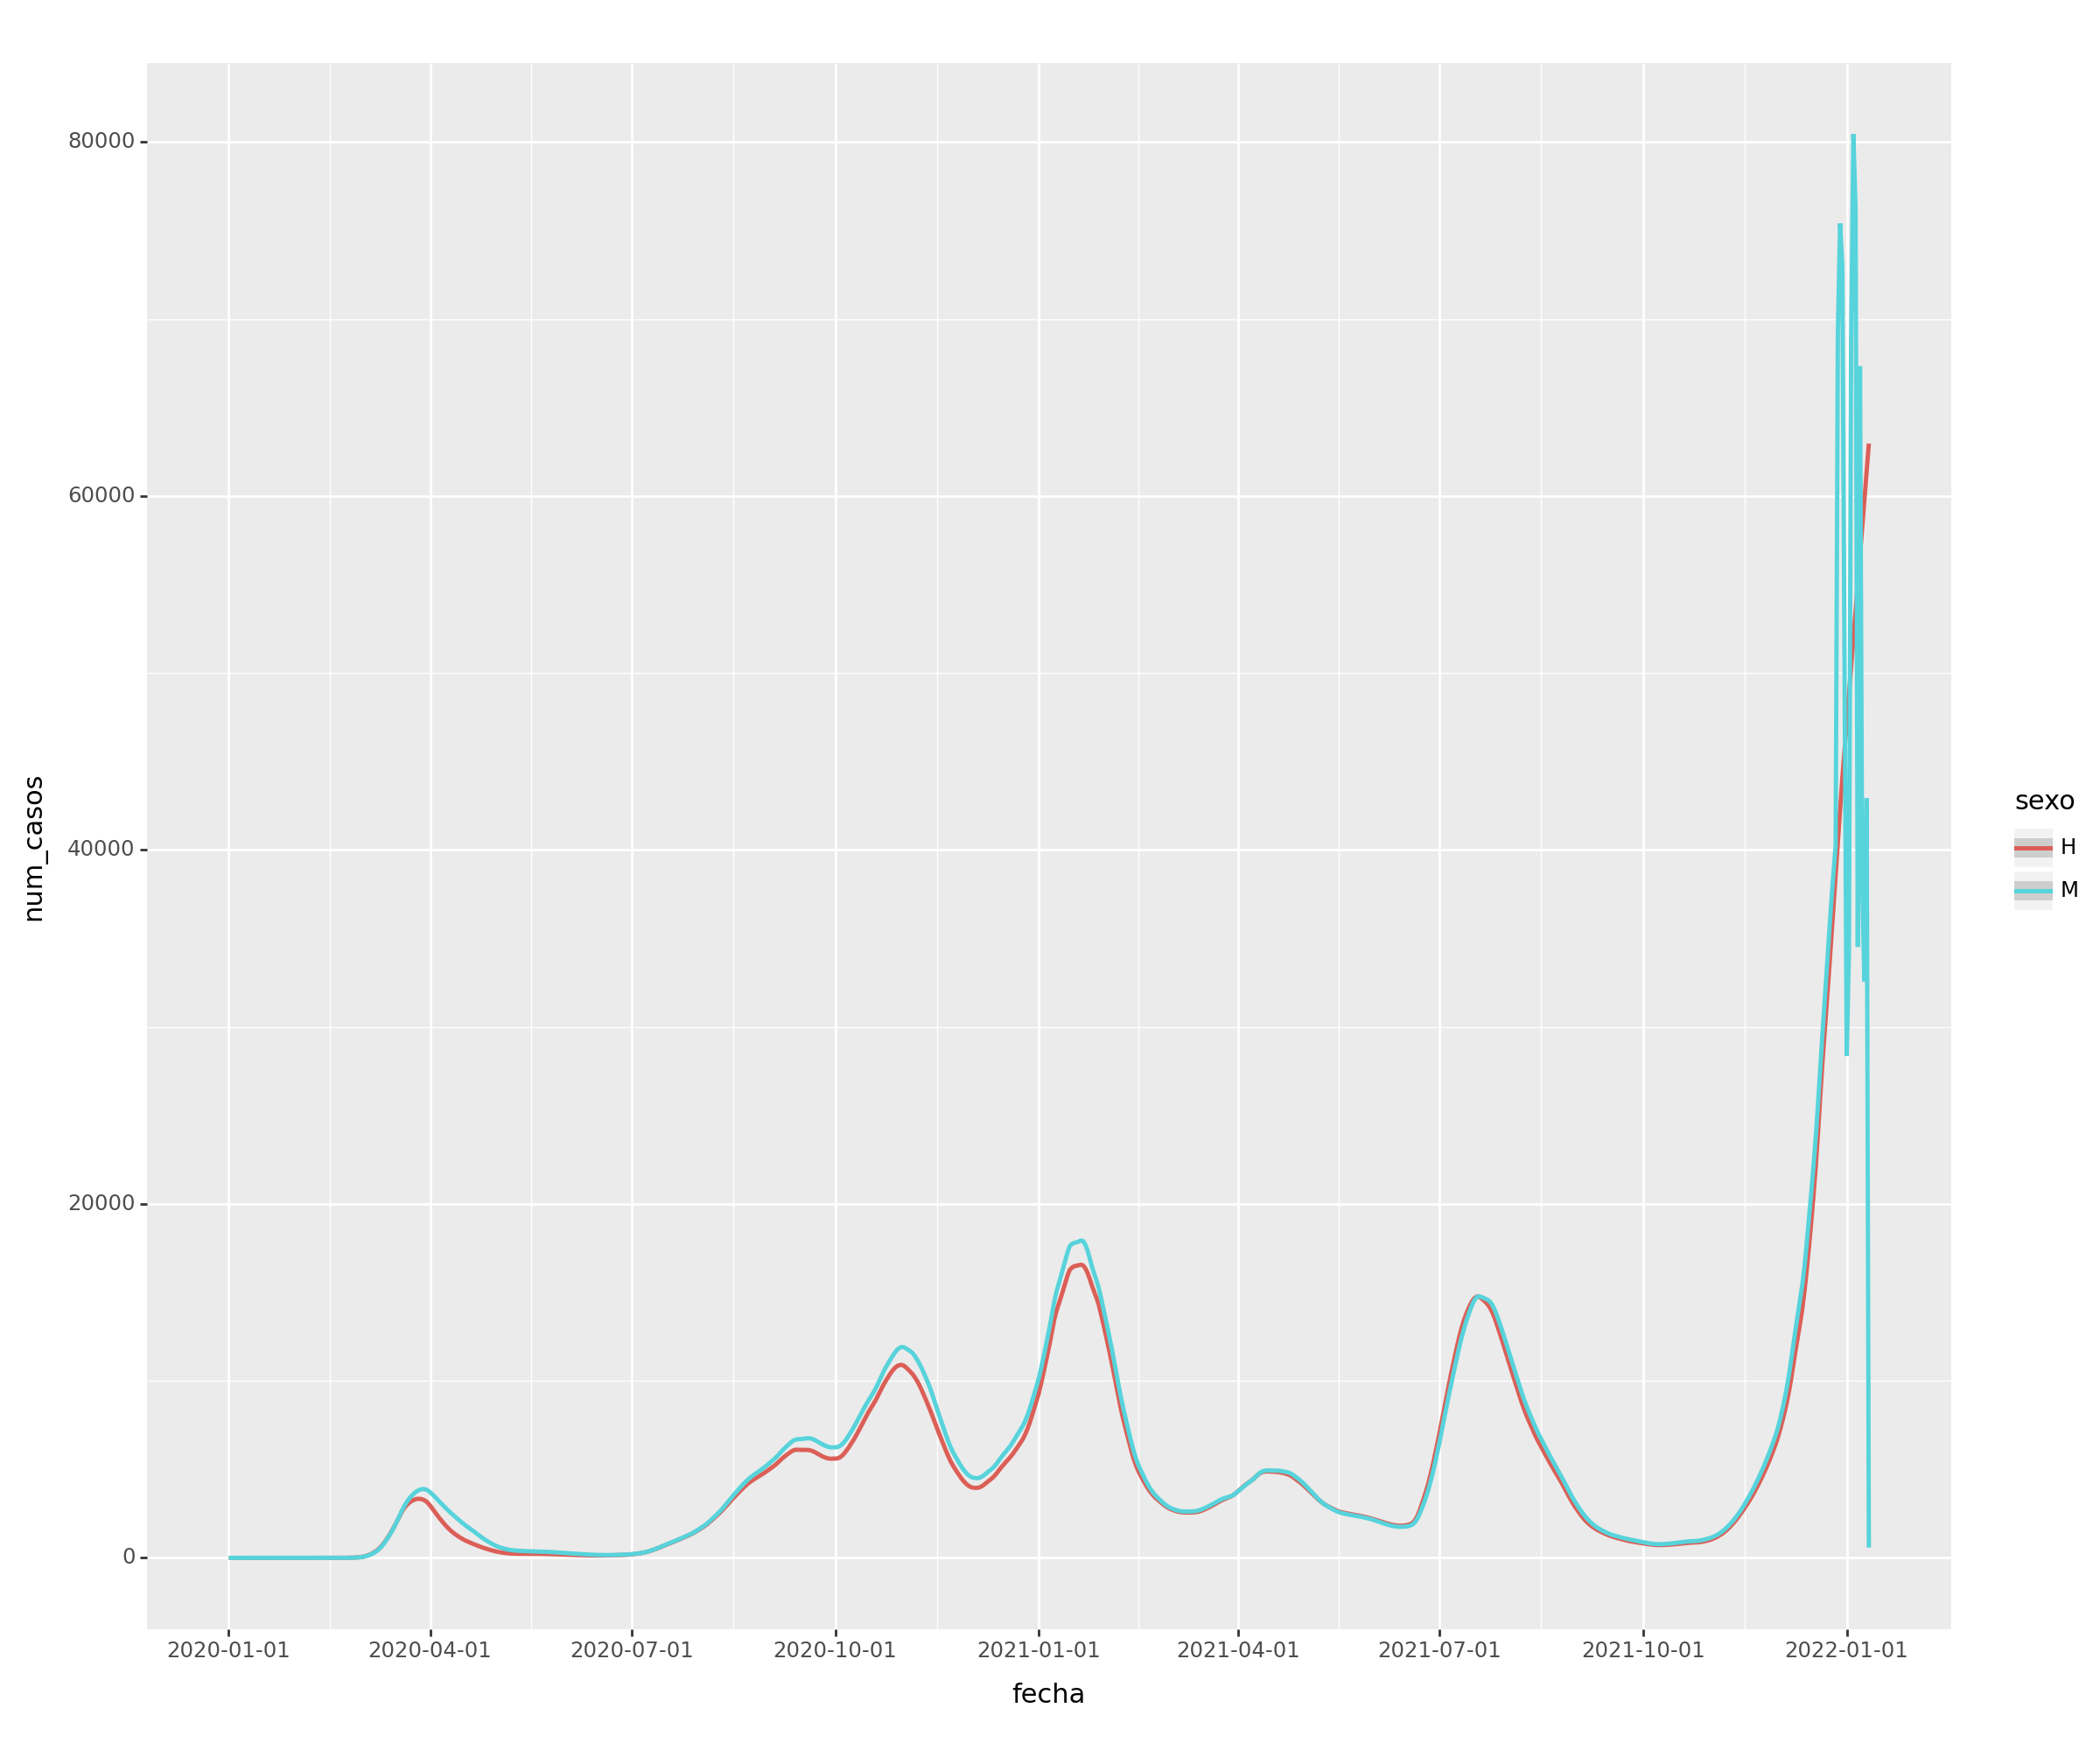

<Figure Size: (1200 x 1000)>

In [43]:
g

In [44]:
ggsave(grafico,
       path = "/content/drive/MyDrive/Colab Notebooks",
       filename = "olas01",
       dpi = 600)

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /content/drive/MyDrive/Colab Notebooks/olas01


/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


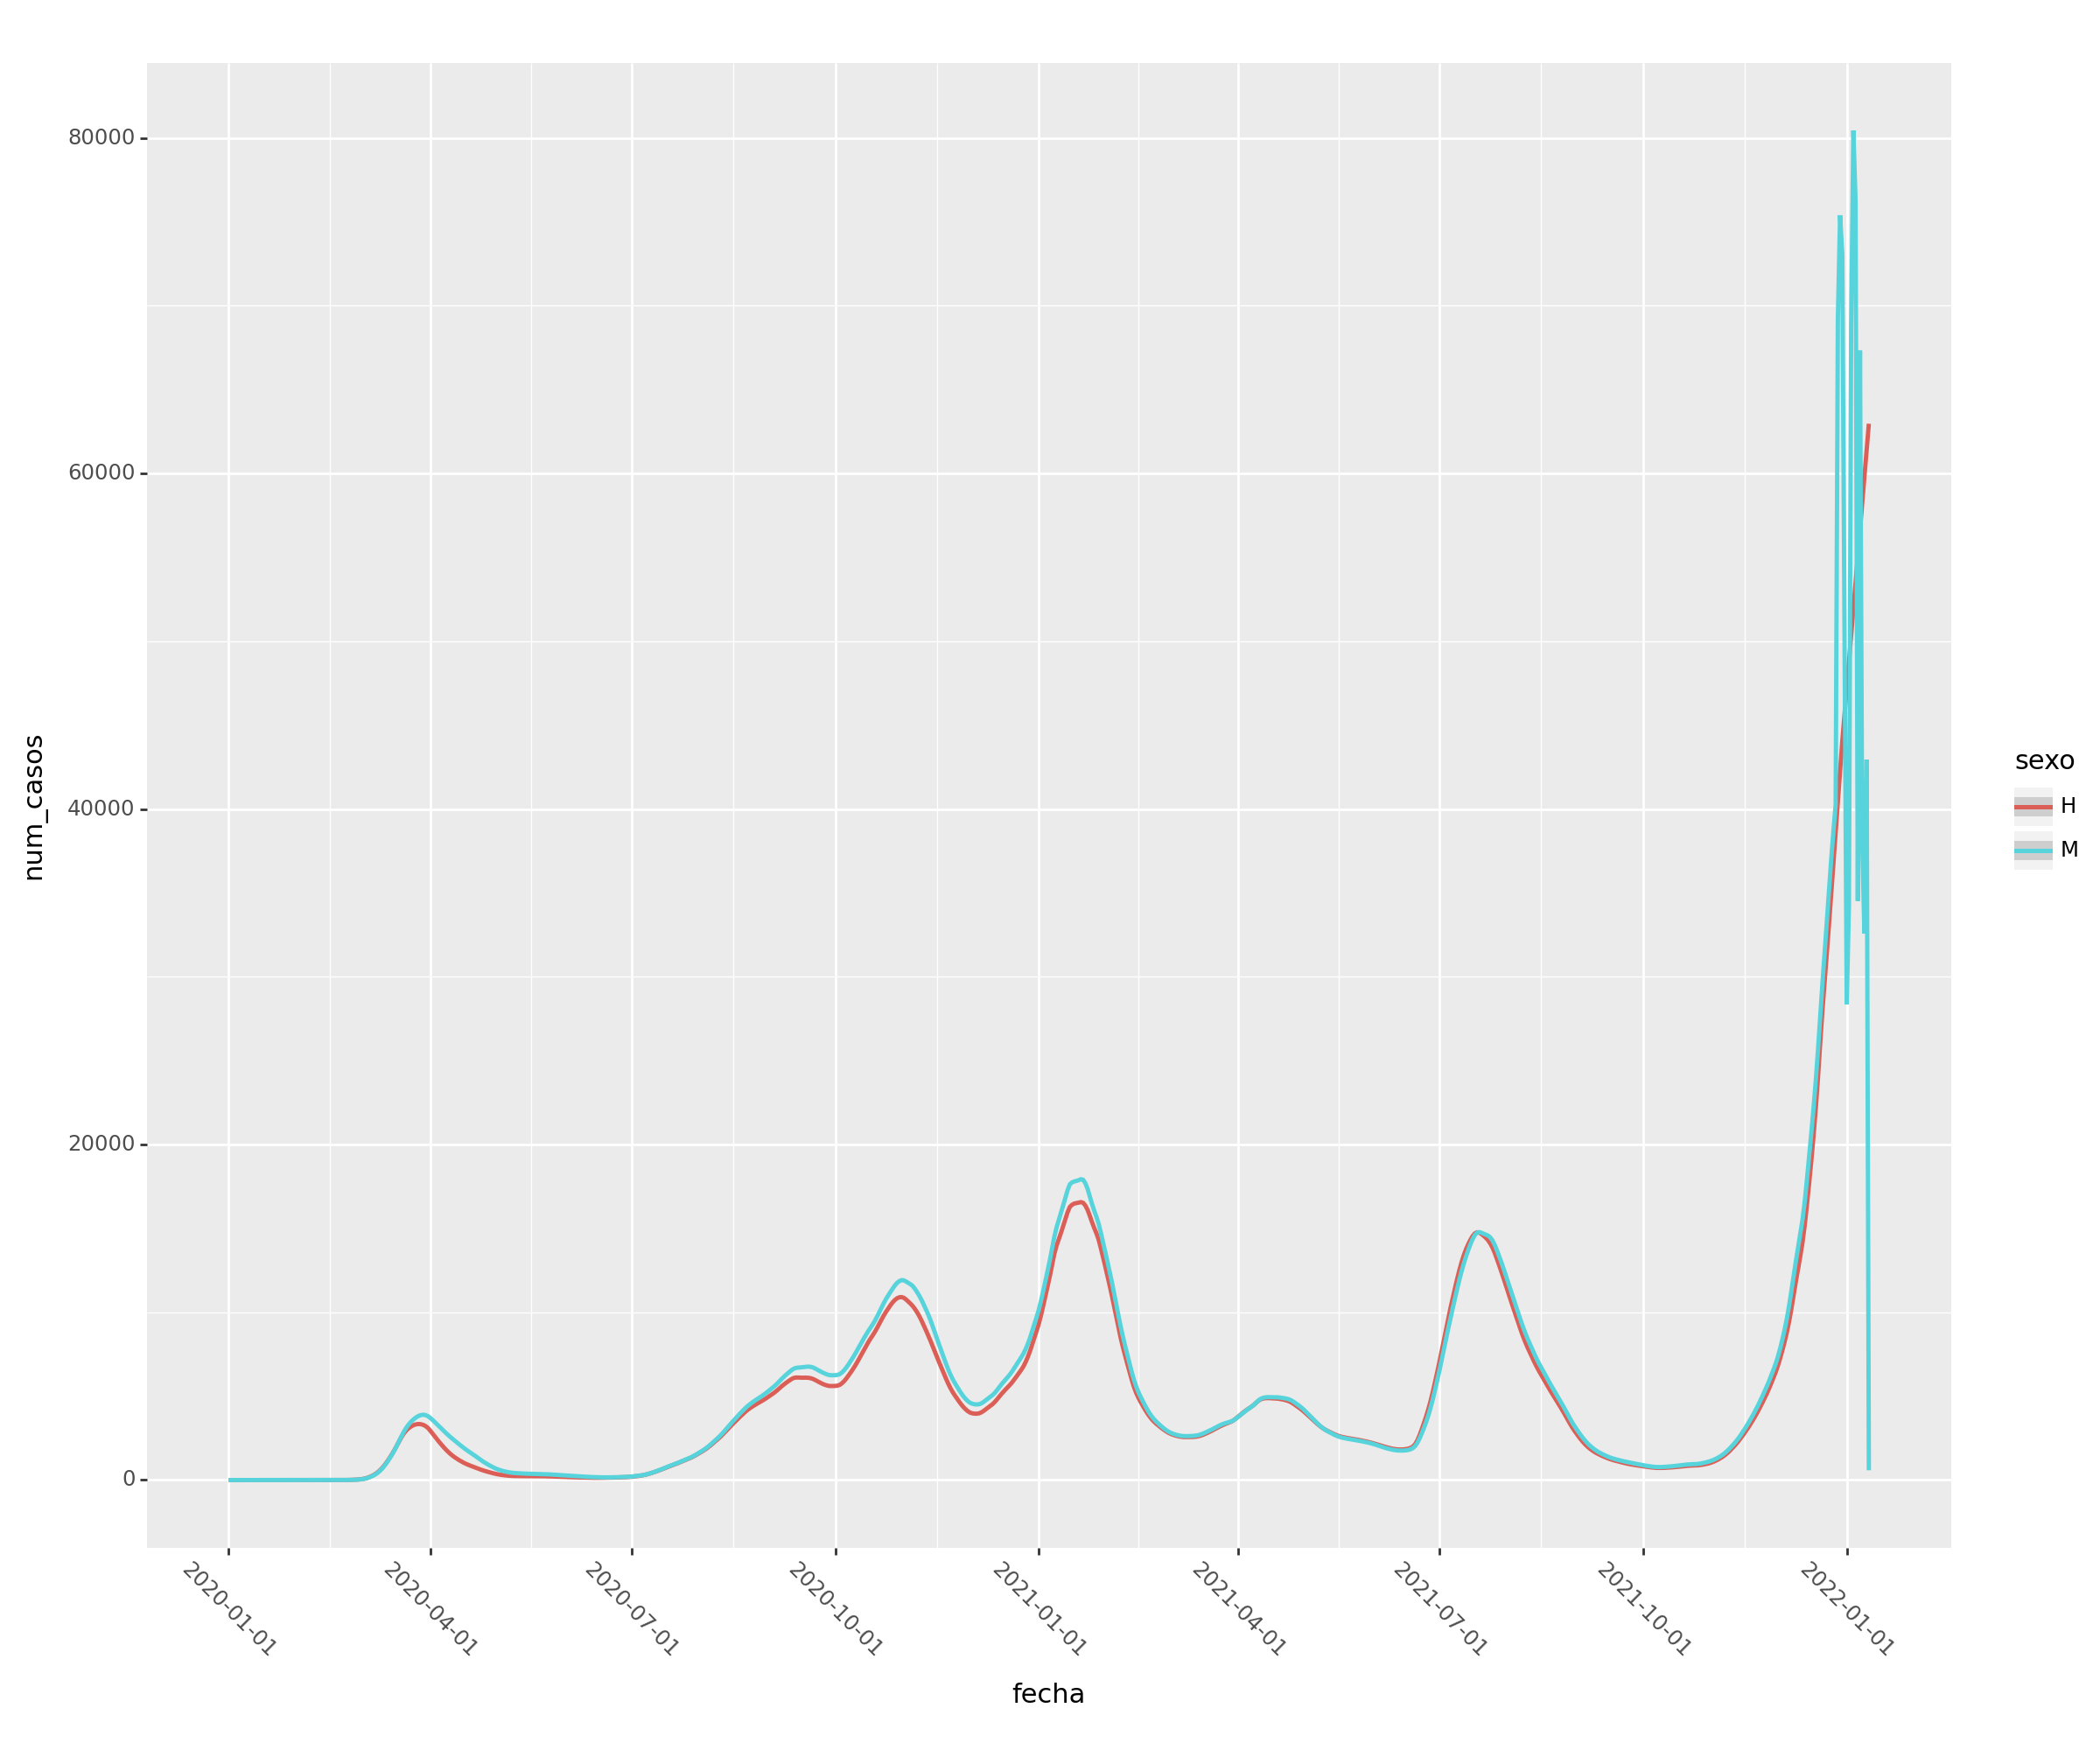

<Figure Size: (1200 x 1000)>

In [45]:
g + theme(axis_text_x = element_text(angle = -45,
                                     vjust = 1))

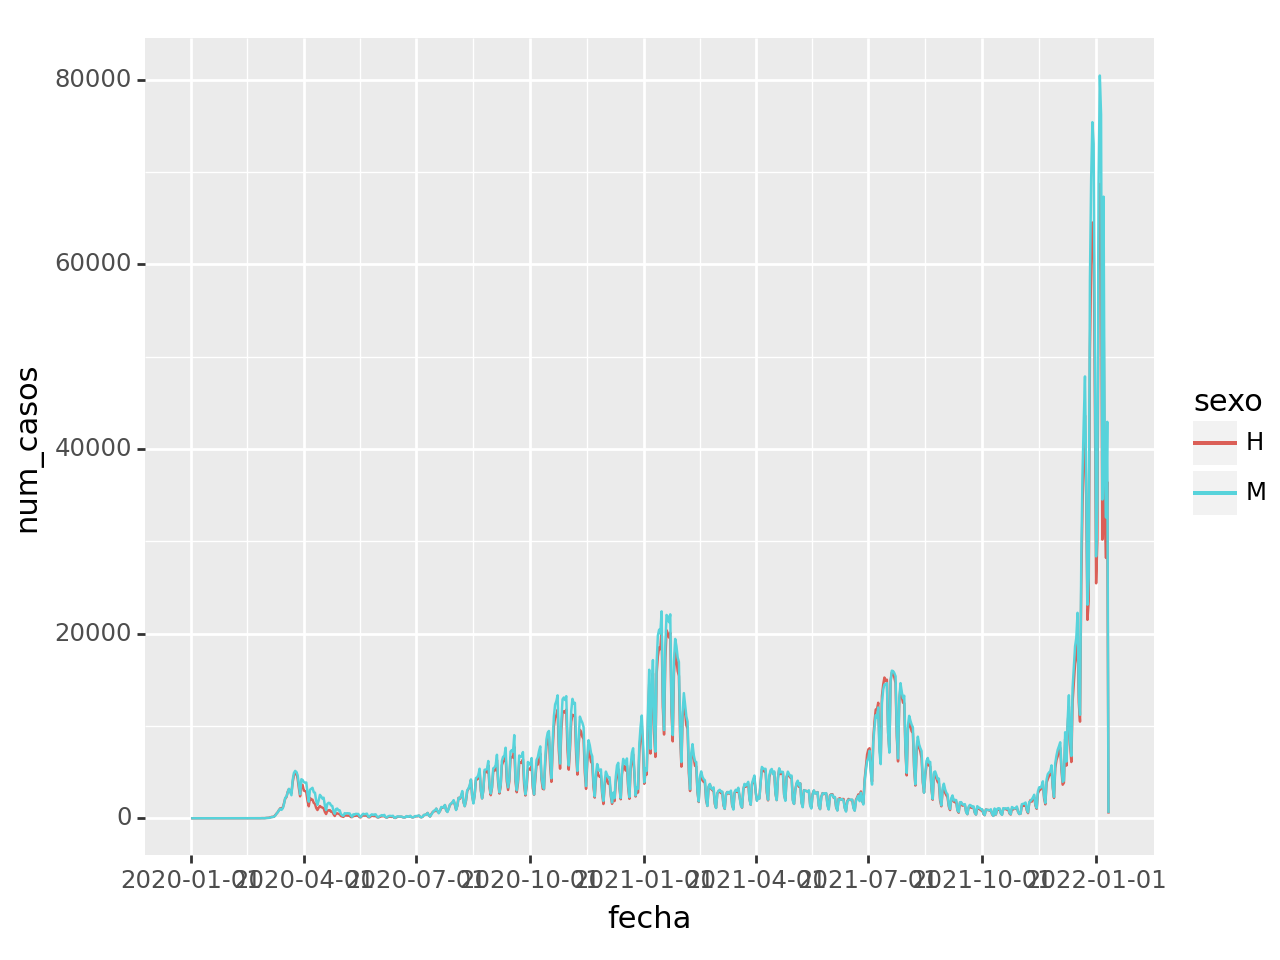

<Figure Size: (640 x 480)>

In [46]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha",
          y = "num_casos",
          color = 'sexo')  # What variable to use
    + geom_line()  # Geometric object to use for drawing
)

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


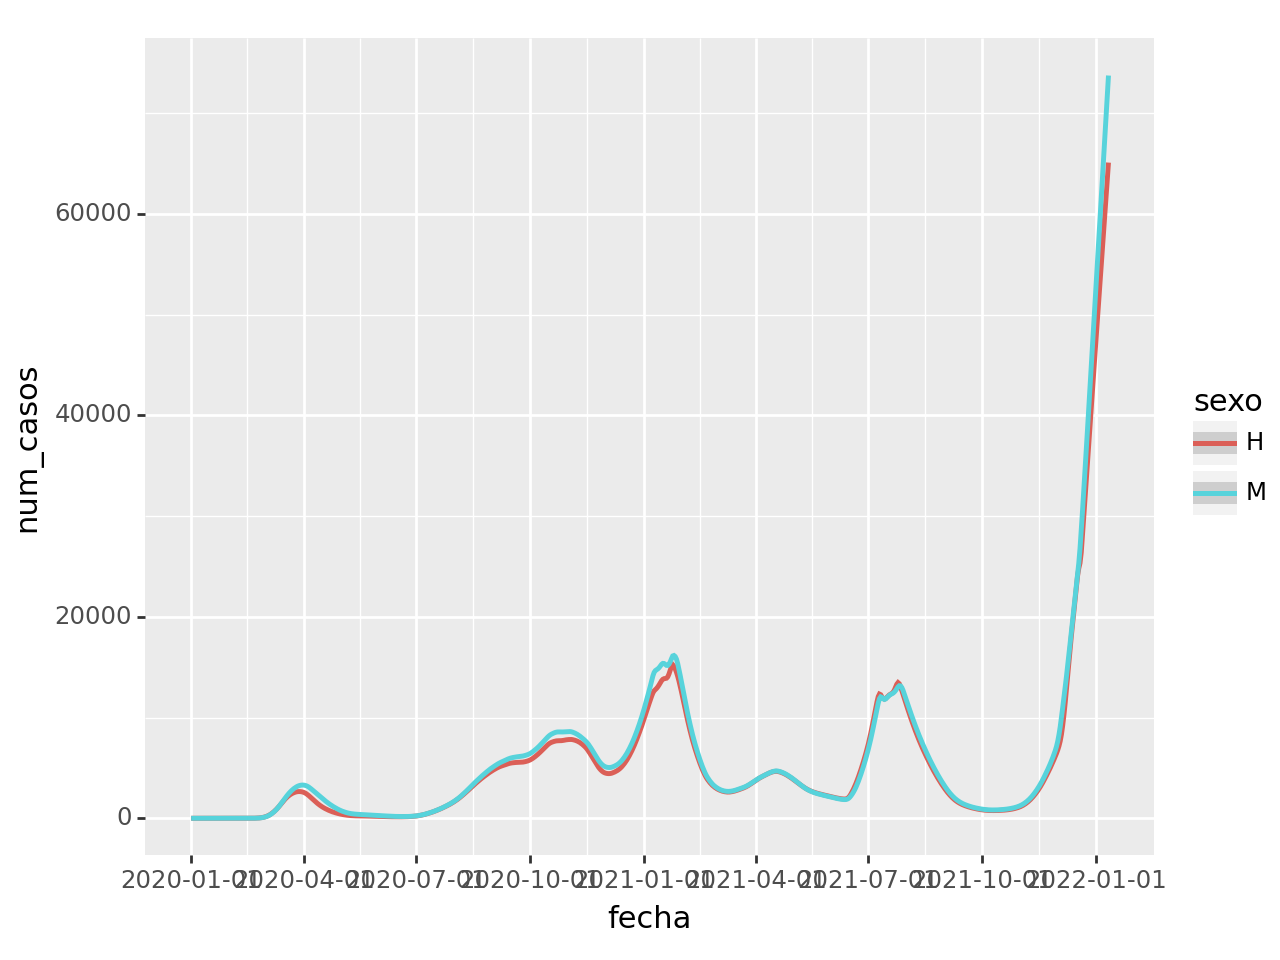

<Figure Size: (640 x 480)>

In [47]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha",
          y = "num_casos",
          color = 'sexo')  # What variable to use
    + geom_smooth(method = "lowess",
                  span = 0.05)  # Geometric object to use for drawing
)

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


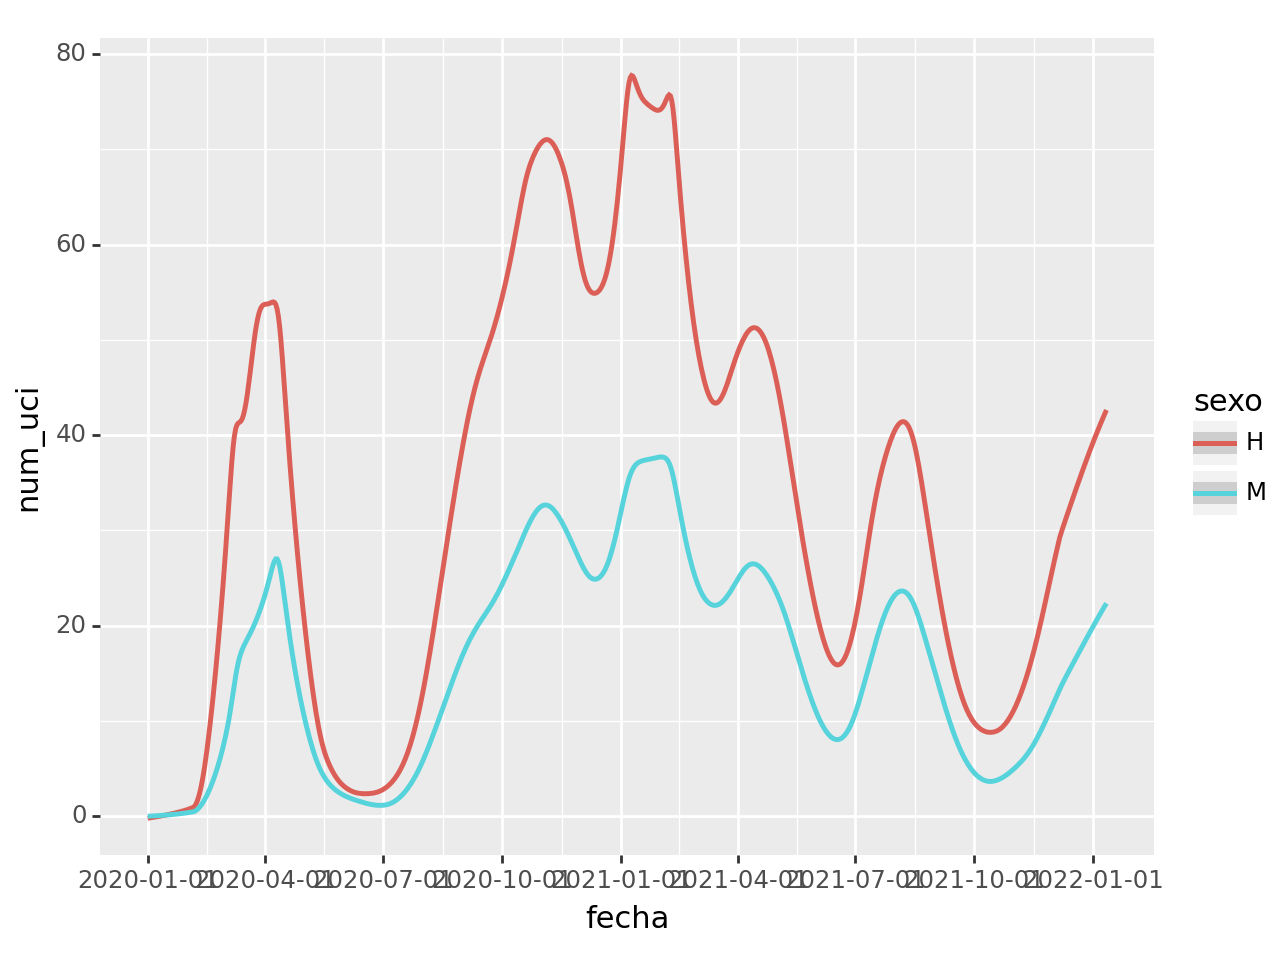

<Figure Size: (640 x 480)>

In [48]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha",
          y = "num_uci",
          color = 'sexo')  # What variable to use
    + geom_smooth(method = "lowess",
                  span = 0.10)  # Geometric object to use for drawing
)

In [51]:
import skmisc

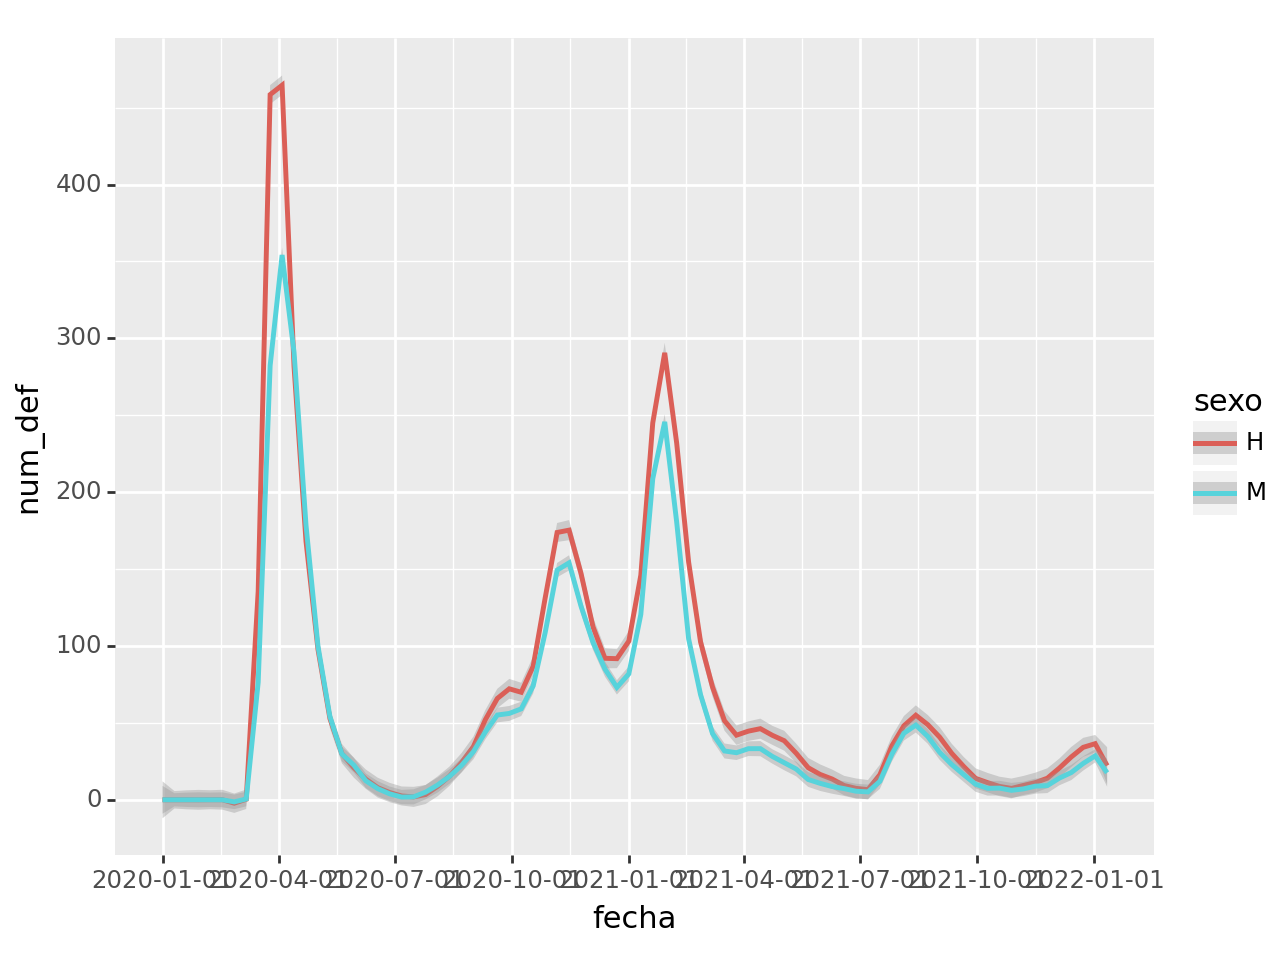

<Figure Size: (640 x 480)>

In [52]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha",
          y = "num_def",
          color = 'sexo')  # What variable to use
    + geom_smooth(method = "loess",
                  span = 0.05)  # Geometric object to use for drawing
)